# E10-1 Artificial Neuron Network:  Perceptron

Perceptron is the simplest element of a neural network: one neuron connected with several dendroids (input) and one or more axons (output).
Here we will create a Python model of it.

## Imports

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [4]:
import os
os.getcwd()

'/home/kristoffer/Desktop/schoolwork/Neural Networks'

In [7]:
# load input data from diagnostic tests, first two numbers are features, the last is a label
data = np.loadtxt('./perceptron.txt')
print(data.shape)
print(data)

(5, 3)
[[0.38 0.19 0.  ]
 [0.17 0.31 0.  ]
 [0.29 0.54 0.  ]
 [0.89 0.55 1.  ]
 [0.78 0.36 1.  ]]


In [11]:
# separate the features from the labels
X = data[:, 0:2]
print(X)

y = data[:, -1]
print(y)

[[0.38 0.19]
 [0.17 0.31]
 [0.29 0.54]
 [0.89 0.55]
 [0.78 0.36]]
[0. 0. 0. 1. 1.]


In [17]:
# reshape the labels back to a column
n = len(data)
y = y.reshape(-1,1)
print(y)

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


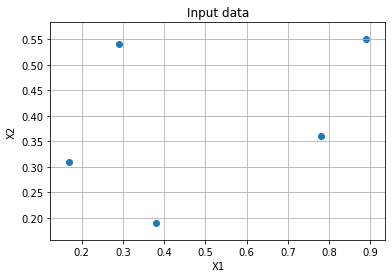

In [13]:
# plot the input data
plt.figure()
plt.title('Input data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.show()

## Building Perceptron
Perceptron is the simplest type of artificial neural network.
It simulates a biological neuron, which accepts input signals via its dendrites and passes the electrical signal to the cell body.<br>
The artificial perceptron receives 'input signals' from the input training data set, which is then weighted and combined in a linear equation, used as an activation function.

## Algorithm

In [ ]:
# X values are the input, y values are the output
# We try to find such weights of X, needed for precise calculation of y

# Activation function calculates a value of firing the neuron
# activation = sum(weight_i * x_i) + bias

# Transfer function predicts the label
# if activation >= 0.0 then prediction = 1.0 else prediction = 0.0

# We reach the solution by iterations - epochs, trying to reduce the inaccuracy of the predicted output
# After the first training iteration (epoch), an error is estimated, weights adjusted, and training repeted

# Learning_rate determines how fast we advance to the solution, adjusting the weights, it is configurable
# w = w + learning_rate * (expected_output - predicted_output) * x

### Activation

In [15]:
# Define the activation function
# FX = FX + X[0]*W[0] + X[1]*W[1]
def predict(X, W, b):
    FX = b   
    for i in range(len(X)):
        FX += X[i]*W[i] 
        
    return 10.0 if FX >= 0.0 else 0.0


### Weights and Bias

In [18]:
# Assume random initial weights and a bias
import random
w1 = random.random()
w2 = random.random()
W = [w1, w2]
W

[0.16617624984871715, 0.14965189087462083]

In [19]:
bias = random.random()
bias

0.2839240175000669

In [25]:
# Define function for correcting weights using stochastic gradient descent
def train(X, y, l_rate, n_epoch):
    W = [0.0 for i in range(len(X[0]))]
    bias = -0.0 
    
    # Loop over epochs
    for epoch in range(n_epoch):
        print('Epoch=%d' %(epoch))
        sum_err = 0.0
        i=0
        # Loop over each row of the training data
        for row in X:
            print('\tRow=', row, 'W =', W, 'bias=', bias)
            
            y_predicted = predict(row, W, bias)
            # calculate the error as expected - predicted
            err = y[i] - y_predicted
            sum_err += err**2
            print("\t\tExpected=%2d, Predicted=%2d, Error=%.2f, Cumulative error=%.2f" %(y[i], y_predicted, err, sum_err))
            
            # Make corrections
            # new bias
            bias += l_rate * err        
            # Loop over each weight in a row for updating it
            n = len(row)
            for j in range(n):
                W[j] += l_rate * err * row[j]
            # End of row        
            i+=1
        # End of epoch
    return W

## Training
### Stochastic Gradient Descent, SGD

In [26]:
# The method requires two parameters
# learning rate - limits the weight correction
l_rate = 0.02
# number of iterations through the data
n_epoch = 100

In [27]:
# Implement the activation function for each data row separately
# Iterate through epochs with updated weights and bias
weights = train(X, y, l_rate, n_epoch)

Epoch=0
	Row= [0.38 0.19] W = [0.0, 0.0] bias= -0.0
		Expected= 0, Predicted=10, Error=-10.00, Cumulative error=100.00
	Row= [0.17 0.31] W = [array([-0.076]), array([-0.038])] bias= [-0.2]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=100.00
	Row= [0.29 0.54] W = [array([-0.076]), array([-0.038])] bias= [-0.2247]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=100.00
	Row= [0.89 0.55] W = [array([-0.076]), array([-0.038])] bias= [-0.26726]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=101.00
	Row= [0.78 0.36] W = [array([-0.0582]), array([-0.027])] bias= [-0.3358]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=102.00
Epoch=1
	Row= [0.38 0.19] W = [array([-0.0426]), array([-0.0198])] bias= [-0.370916]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [array([-0.0426]), array([-0.0198])] bias= [-0.390866]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.29 0.54] W = [array([-0.0426]), a

	Row= [0.78 0.36] W = [array([0.0864]), array([-0.0472])] bias= [-0.21886]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=2.00
Epoch=20
	Row= [0.38 0.19] W = [array([0.102]), array([-0.04])] bias= [-0.14846]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [array([0.102]), array([-0.04])] bias= [-0.1173]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.29 0.54] W = [array([0.102]), array([-0.04])] bias= [-0.11236]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.89 0.55] W = [array([0.102]), array([-0.04])] bias= [-0.10438]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=1.00
	Row= [0.78 0.36] W = [array([0.1198]), array([-0.029])] bias= [-0.0156]
		Expected= 1, Predicted=10, Error=-9.00, Cumulative error=82.00
Epoch=21
	Row= [0.38 0.19] W = [array([-0.0206]), array([-0.0938])] bias= [-0.112596]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [arra

	Row= [0.38 0.19] W = [array([0.0128]), array([-0.0756])] bias= [-0.308688]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [array([0.0128]), array([-0.0756])] bias= [-0.318188]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.29 0.54] W = [array([0.0128]), array([-0.0756])] bias= [-0.339448]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.89 0.55] W = [array([0.0128]), array([-0.0756])] bias= [-0.37656]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=1.00
	Row= [0.78 0.36] W = [array([0.0306]), array([-0.0646])] bias= [-0.386748]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=2.00
Epoch=43
	Row= [0.38 0.19] W = [array([0.0462]), array([-0.0574])] bias= [-0.366136]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [array([0.0462]), array([-0.0574])] bias= [-0.359486]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.29 0.54] W

	Row= [0.29 0.54] W = [array([0.0018]), array([-0.0946])] bias= [-0.901018]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.89 0.55] W = [array([0.0018]), array([-0.0946])] bias= [-0.95158]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=1.00
	Row= [0.78 0.36] W = [array([0.0196]), array([-0.0836])] bias= [-0.982008]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=2.00
Epoch=58
	Row= [0.38 0.19] W = [array([0.0352]), array([-0.0764])] bias= [-0.976816]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [array([0.0352]), array([-0.0764])] bias= [-0.977956]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.29 0.54] W = [array([0.0352]), array([-0.0764])] bias= [-0.995656]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.89 0.55] W = [array([0.0352]), array([-0.0764])] bias= [-1.026704]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=1.00
	Row= [0.78 0.36] W

	Row= [0.78 0.36] W = [array([-0.0542]), array([-0.143])] bias= [-0.12578]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=82.00
Epoch=71
	Row= [0.38 0.19] W = [array([-0.0386]), array([-0.1358])] bias= [-0.199536]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [array([-0.0386]), array([-0.1358])] bias= [-0.240006]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.29 0.54] W = [array([-0.0386]), array([-0.1358])] bias= [-0.288666]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.89 0.55] W = [array([-0.0386]), array([-0.1358])] bias= [-0.373192]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=1.00
	Row= [0.78 0.36] W = [array([-0.0208]), array([-0.1248])] bias= [-0.462236]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=2.00
Epoch=72
	Row= [0.38 0.19] W = [array([-0.0052]), array([-0.1176])] bias= [-0.503388]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Ro

	Row= [0.78 0.36] W = [array([0.0478]), array([-0.071])] bias= [-0.3471]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=2.00
Epoch=91
	Row= [0.38 0.19] W = [array([0.0634]), array([-0.0638])] bias= [-0.315376]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 0.31] W = [array([0.0634]), array([-0.0638])] bias= [-0.303406]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.29 0.54] W = [array([0.0634]), array([-0.0638])] bias= [-0.312406]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.89 0.55] W = [array([0.0634]), array([-0.0638])] bias= [-0.328472]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=1.00
	Row= [0.78 0.36] W = [array([0.0812]), array([-0.0528])] bias= [-0.287136]
		Expected= 1, Predicted= 0, Error=1.00, Cumulative error=2.00
Epoch=92
	Row= [0.38 0.19] W = [array([0.0968]), array([-0.0456])] bias= [-0.222808]
		Expected= 0, Predicted= 0, Error=0.00, Cumulative error=0.00
	Row= [0.17 

In [28]:
# Test
k = 0.78*0.023 + 0.36*0.0178 - 0.02
k

0.004348000000000001

In [29]:
k = 0.38*0.023 + 0.19*0.017 -0.02
k

-0.00803

## Using Library Function

In [32]:
 !pip install neurolab
import neurolab as nl
# Dimensions of the inputs
d1min, d1max, d2min, d2max = 0, 1, 0, 1
inp1 = [d1min, d1max]
inp2 = [d2min, d2max]
inp = [inp1, inp2]

# One output neuron, producing binary result
outp = y.shape[1]

     |████████████████████████████████| 655kB 6.0MB/s eta 0:00:01
  Created wheel for neurolab: filename=neurolab-0.3.5-cp37-none-any.whl size=22181 sha256=656f7d3e0f5c265cad27ab03adbad3130bb010b6e2dc3196ca588629f7e0e649
  Stored in directory: /home/kristoffer/.cache/pip/wheels/c6/8f/37/32ab1cf4d601dc0bc49d7241012a4292db4b343bebff5b68e6
Successfully built neurolab
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Adgang nægtet: '/home/kristoffer/anaconda3/lib/python3.7/site-packages/neurolab'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'neurolab'

In [ ]:
perceptron = nl.net.newp(inp, outp)
print(perceptron)

### Train Model

In [ ]:
# Measure the error of classification at each itteration
err = perceptron.train(X, y, epochs=100, show=20, lr=0.03)
print(err)

In [ ]:
# Plot the error
plt.figure()
plt.title('Training Error Progress')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(err)
plt.grid()
plt.show()

In [31]:
### Run the classifier on test datapoints
print('\nTest results:')
data_test = [[0.38, 0.19], [0.4, 0.6], [0.7, 0.1]]
for item in data_test:
    print(item, '-->', perceptron.sim([item])[0])


Test results:


NameError: name 'perceptron' is not defined

## Test With Other Data

In [ ]:
# 